In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("Advertising.csv")


In [3]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
df.isnull()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [5]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [10]:
df2=df.drop(['Unnamed: 0'],axis='columns')

In [11]:
df2

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


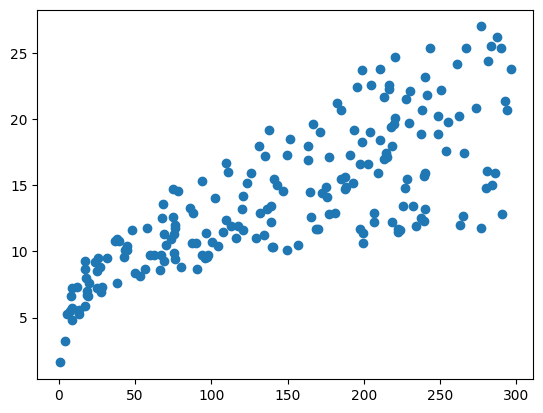

In [20]:
a=df['TV']
b=df['Sales']
plt.scatter(a,b)

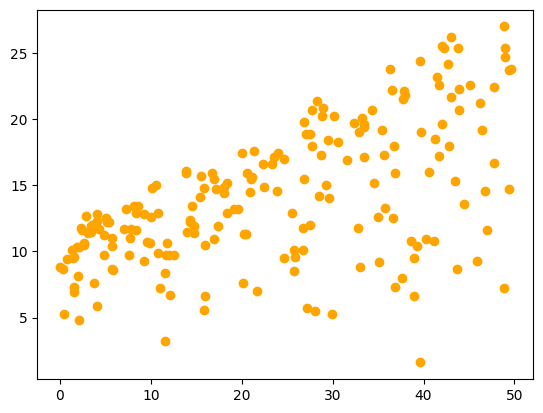

In [22]:
a=df['Radio']
b=df['Sales']
plt.scatter(a,b,color='orange')

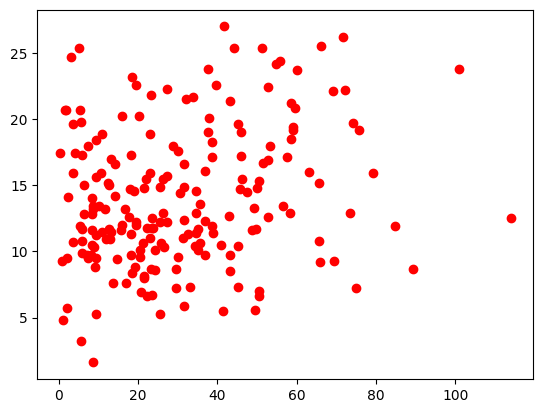

In [21]:
a=df['Newspaper']
b=df['Sales']
plt.scatter(a,b,color='red')

In [13]:
X=df2.drop(['Sales'],axis='columns')
y=df2['Sales']

In [14]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=1)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [27]:
lr.predict(X_train)

array([ 3.65921577,  7.25612637,  6.00481636, 18.46169785,  8.37406584,
       14.12454209, 15.0161764 , 20.40205426, 20.61382233, 19.61731651,
       24.16323248, 14.88403603,  6.73108467, 19.86205547, 18.92113796,
       12.49612522, 14.17816602,  6.11982211, 15.33821244,  9.59951578,
       12.04789746, 12.04846338,  8.52368581, 21.61141557, 23.30426145,
       12.24026439,  6.68855681, 17.80465348, 16.50075138,  8.78138524,
       20.39682769, 20.67376942, 24.24311844, 10.16119323, 10.51556751,
       16.43194712, 10.46014901,  6.66787113, 21.36473141, 14.43134771,
       15.49693622, 10.09789459, 14.96838524, 13.86965306,  8.38839734,
        8.85070713, 10.14373392,  8.16326623, 17.03095529, 15.20888698,
       16.80513965, 23.24354445, 13.44178745,  9.88629559, 18.11788026,
       14.82702155,  5.393657  , 12.87619027, 11.91409761, 12.09709362,
       11.73318833, 14.99985124,  4.60082043, 16.36095126, 12.08805647,
       17.79795119, 15.41316291, 18.63426135, 11.5184553 , 13.89

In [28]:
lr.score(X_test,y_test)

0.8927605914615384

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

In [32]:
cv=ShuffleSplit(n_splits=5,test_size=.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.86011452, 0.86585312, 0.77862448, 0.86569992, 0.85743383])

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [36]:
def get_best_model(X,y):
    algos={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
#                 'normalize':[Tr]
            }
        },
        'Lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree_regressor':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    
    scores=[]
    cv=ShuffleSplit(n_splits=3,test_size=.2,random_state=0)
    for model_name,mp in algos.items():
        clf=GridSearchCV(mp['model'],mp['params'],cv=cv,return_train_score=False)
        clf.fit(X,y)
        scores.append({
            'model':model_name,
            'best_score':clf.best_score_,
            'best_params':clf.best_params_
        })
        
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [37]:
get_best_model(X,y)

C:\Users\agarw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
6 fits failed out of a total of 12.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\agarw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\agarw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\agarw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py",

,model,best_score,best_params
0,linear_regression,0.834864,{}
1,Lasso,0.836127,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree_regressor,0.942427,"{'criterion': 'friedman_mse', 'splitter': 'ran..."
